In [25]:
import numpy as np
import random
from itertools import product
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
def prob_infection(d, capacity):
    I = 1
    q = 0.238
    p = 0.3 / 60
    Q = 10 * 0.01 * capacity
    t = 2 * 60 * 60
    
    P_d = (-18.19 * np.log(d) + 44.276) / 100
    P_i = 1 - np.exp(-P_d * ((I * q * p * t) / Q))
    return P_i if P_i >= 0 else 0

In [27]:
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2  + (y1 - y2) ** 2)

In [28]:
def generate_sitting_array(social_distancing):
    # Distance between two people siting side (the centers of their chairs) is 50cm/0.5m
    # The distance across a walkway is 2m (1.5m walk + distance from center of chairs)
    # Grid at 0.5m distances
    south_one_sitting = np.array(
        [
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
            [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
            + [0] * 4
            + [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
            [0] * 53,
            [0] * 53,
        ]
    )

    social_distancing = int(social_distancing * 2)

    for i in range(south_one_sitting.shape[0]):
        top_bound = i - social_distancing if i - social_distancing >= 0 else 0
        bottom_bound = (
            i + social_distancing
            if i + social_distancing <= south_one_sitting.shape[0] - 1
            else south_one_sitting.shape[0] - 1
        )

        for j in range(south_one_sitting.shape[1]):
            if south_one_sitting[i, j] == 1:
                left_bound = j - social_distancing if j - social_distancing >= 0 else 0
                right_bound = (
                    j + social_distancing
                    if j + social_distancing <= south_one_sitting.shape[1] - 1
                    else south_one_sitting.shape[1] - 1
                )

                square_of_interest = south_one_sitting[top_bound:bottom_bound, left_bound:right_bound]
                for k, l in product(range(square_of_interest.shape[0]), range(square_of_interest.shape[1])):
                    if (
                        distance(top_bound + k, left_bound + l, i, j) < social_distancing
                        and square_of_interest[k, l] == 2
                    ):
                        break
                else:
                    south_one_sitting[i, j] = 2

    plt.imshow(south_one_sitting)

    return south_one_sitting


In [29]:
def generate_map(canvas, sitting_array):
    accum = 1
    
    for i in range(sitting_array.shape[0]):
        for j in range(sitting_array.shape[1]):
            if sitting_array[i, j] == 2:
                canvas.node(accum).add()
                canvas.edges(((accum, node) for node in range(1, accum))).add()
                accum += 1

In [30]:
def random_trigger(prob):
    return random.uniform(0.0, 1.0) <= prob

In [31]:
prob_infection(3, 296 + 1)

0.06768024547354012

In [32]:
random.uniform(0.0, 1.0)

0.5348045419978247

0.0
1.0
2.0
3.0
4.0
5.0


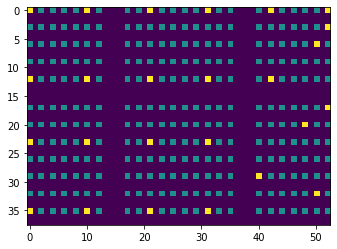

In [41]:
EXTERNAL_INFECTION_PROB = 7594 / 7 / 6_656_300 # Infection data / 7 / population data (abs)
CAPACITY = 296 + 1
INFECTIOUS_PERIOD = 10
MIN_SOCIAL_DISTANCING = 0
MAX_SOCIAL_DISTANCING = 5
RUNS = 10 # Minimum 20


data = {}
for social_distancing in np.arange(MIN_SOCIAL_DISTANCING, MAX_SOCIAL_DISTANCING + 1, 1.0):
    print(social_distancing)
    data[social_distancing] = {}
    for i in range(RUNS):
        sitting_array = generate_sitting_array(social_distancing)
        num_students = (sitting_array == 2).sum()

        data[social_distancing][i] = {}

        resistant = []
        while len(resistant) == 0:
            tmp_sitting_array = sitting_array.copy()
            uninfected = np.argwhere(sitting_array == 2).tolist()
            infected = {i: [] for i in range(1, INFECTIOUS_PERIOD + 1)}
            resistant = []
            external_infection = 0
            
            for week in range(1, 13):
                # fig, (ax1, ax2) = plt.subplots(1, 2)
                
                for _ in range(7):
                    for student in uninfected.copy():
                        if random_trigger(EXTERNAL_INFECTION_PROB):
                            infected[INFECTIOUS_PERIOD].append(student)
                            uninfected.remove(student)
                            tmp_sitting_array[student[0], student[1]] = 3
                            external_infection += 1
                    
                    resistant.extend(infected[1])
                    for j in range(1, INFECTIOUS_PERIOD):
                        infected[j] = infected[j+1]
                    infected[INFECTIOUS_PERIOD] = []
                
                for x, y in resistant:
                    tmp_sitting_array[x, y] = 4
                
                # ax1.imshow(tmp_sitting_array == 3)
                
                for j in range(INFECTIOUS_PERIOD, 0, -1):
                    for infector in infected[j].copy():
                        for infectable in uninfected.copy():
                            d = distance(infector[0], infector[1], infectable[0], infectable[1]) / 2
                            P_i = prob_infection(d, CAPACITY)
                            if random_trigger(P_i):
                                infected[INFECTIOUS_PERIOD].append(infectable)
                                uninfected.remove(infectable)
                                tmp_sitting_array[infectable[0], infectable[1]] = 3
                                
                # ax2.imshow(tmp_sitting_array == 3)
                # fig.show()
                
                data[social_distancing][i][week] = {
                    "infected": len(infected),
                    "uninfected":len(uninfected),
                    "resistant": len(resistant),
                }
                
        # transmission_factor = (len(resistant) - external_infection) / len(uninfected)
        

In [39]:
# df = pd.DataFrame(transmission_factors)
# means = df.mean()
# display(means)
import pprint
pprint.pprint(data)

{0.0: {0: {1: {'infected': {1: [],
                            2: [],
                            3: [],
                            4: [],
                            5: [],
                            6: [],
                            7: [],
                            8: [],
                            9: [],
                            10: []},
               'resistant': [[32, 29],
                             [35, 52],
                             [26, 46],
                             [17, 27],
                             [23, 19],
                             [26, 25],
                             [26, 31],
                             [29, 17],
                             [29, 31],
                             [35, 31],
                             [17, 40],
                             [23, 42],
                             [26, 52],
                             [32, 40],
                             [32, 42],
                             [35, 46],
                        